In [9]:
import matplotlib.pyplot as plt
import pickle
import utilities
import os.path


In [23]:
def plothillclimb(file, baselines=None):
    if os.path.isdir(file):
        files = [os.path.join(file, f) for f in os.listdir(file)]
        baseline = next((f for f in files if 'bs' in f and "pkl" in f), None)
        for f in files:
            if "hc" in f and "pkl" in f:
                plothillclimb(f, baseline)
        return
    if "pkl" not in file:
        file += ".pkl"
    if "out" not in file:
        file = "out/" + file
    with open(file,'rb') as savefile:
        save = pickle.load(savefile)
    print(save["args"])
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,8))
    accs = [log['validation']['accuracy'][-1] for (key, log) in save.items() if key != "args"]
    maxacc = max(accs)
    minacc = min(accs)
    epochsteps = [log['epochsteps'][-1] for (key, log) in save.items() if key != "args"]
    print(minacc, maxacc, epochsteps)
    ax1.set_yscale('log')
    for (i, (uuid, log)) in enumerate(sorted([(key, log) for (key, log) in save.items() if key != "args"], key=lambda x: x[1]['validation']['accuracy'][-1], reverse=True)):
        if i > 1000:
            break
        if len(log['epochsteps']) > 5 and log['epochsteps'][0] == log['epochsteps'][5]:
            print("test")
            for i in range(5):
                log['epochsteps'][i] -= 1
            for i in range(190):
                log['trainsteps'][i] -= 1
        alpha = ((log['validation']['accuracy'][-1]-minacc)/(maxacc-minacc))**8
        if i < 10 and log['epochsteps'][-1] > max(epochsteps)*0.9:
            if type(log["ghistory"][-1][-1]) is tuple:
                label = str(log["ghistory"][-1])+" - "+str(log['validation']['accuracy'][-1])[:6]
            else:
                label = str(log["ghistory"][-6:])+" - "+str(log['validation']['accuracy'][-1])[:6]
            label = label.replace('(0, 0)', '$C_1$')
            label = label.replace('(0, 1)', '$C_2$')
            label = label.replace('(0, 2)', '$C_4$')
            label = label.replace('(0, 3)', '$C_8$')
            label = label.replace('(0, 4)', '$C_{16}$')
            label = label.replace('(1, 0)', '$D_1$')
            label = label.replace('(1, 1)', '$D_2$')
            label = label.replace('(1, 2)', '$D_4$')
            label = label.replace('(1, 3)', '$D_8$')
            label = label.replace('(1, 4)', '$D_{16}$')
        else:
            label = None
        if alpha > 0.0:
            ax1.plot(log['trainsteps'], log['train']['batchloss'], alpha=alpha, linewidth = alpha)
            ax2.plot(log['epochsteps'], log['validation']['accuracy'], alpha=alpha, linewidth = alpha)
            ax3.plot(log['epochsteps'], log['validation']['accuracy'], alpha=alpha, label=label)
    ax1.set_title('Training loss')
    ax2.set_title('Validation accuracy')
    ax3.set_title('Validation accuracy (zoomed in)')
    ax1.set_xlabel('Generations')
    ax2.set_xlabel('Generations')
    ax3.set_xlabel('Generations')
    ax1.set_ylabel('Loss')
    ax2.set_ylabel('Accuracy')
    ax3.set_ylabel('Accuracy')
    if baselines is not None:
        if "pkl" not in baselines:
            baselines += ".pkl"
        if "out" not in baselines:
            baselines = "out/" + baselines
        with open(baselines,'rb') as savefile:
            save = pickle.load(savefile)
        print(save["args"])
        accs = [log['validation']['accuracy'][-1] for (key, log) in save.items() if key != "args"]
        for (i, (uuid, log)) in enumerate([(key, log) for (key, log) in save.items() if key != "args"]):
            if len(log['epochsteps']) > 5 and log['epochsteps'][0] == log['epochsteps'][5]:
                for i in range(5):
                    log['epochsteps'][i] -= 1
                for i in range(190):
                    log['trainsteps'][i] -= 1
            if type(log["ghistory"][-1][-1]) is tuple:
                label = "Baseline: "+str(log["ghistory"][-1])+" - "+str(log['validation']['accuracy'][-1])[:6]
            else:
                label = "Baseline: "+str(log["ghistory"][-6:])+" - "+str(log['validation']['accuracy'][-1])[:6]
            label = label.replace('(0, 0)', '$C_1$')
            label = label.replace('(0, 1)', '$C_2$')
            label = label.replace('(0, 2)', '$C_4$')
            label = label.replace('(0, 3)', '$C_8$')
            label = label.replace('(0, 4)', '$C_{16}$')
            label = label.replace('(1, 0)', '$D_1$')
            label = label.replace('(1, 1)', '$D_2$')
            label = label.replace('(1, 2)', '$D_4$')
            label = label.replace('(1, 3)', '$D_8$')
            label = label.replace('(1, 4)', '$D_{16}$')
            ax1.plot(log['trainsteps'], log['train']['batchloss'], alpha=alpha, linewidth = alpha)
            ax2.plot(log['epochsteps'], log['validation']['accuracy'], alpha=alpha, linewidth = alpha)
            ax3.plot(log['epochsteps'], log['validation']['accuracy'], alpha=alpha, label=label)
    ax3.set_ylim(0.8*maxacc, 1.05*maxacc)
    ax3.legend(loc='upper left')
    plt.savefig(file[:-2]+'ng')


{'epochs': 0.2, 'iterations': 50, 'lr': 0.03, 'allkids': False, 'popsize': 10, 'baselines': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': False, 'seed': -1, 'dea': True, 'noskip': False, 'pareto': True, 'test': False, 'folder': ''}
0.2904166877269745 0.9600000381469727 [0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0, 19.0, 19.0, 19.0

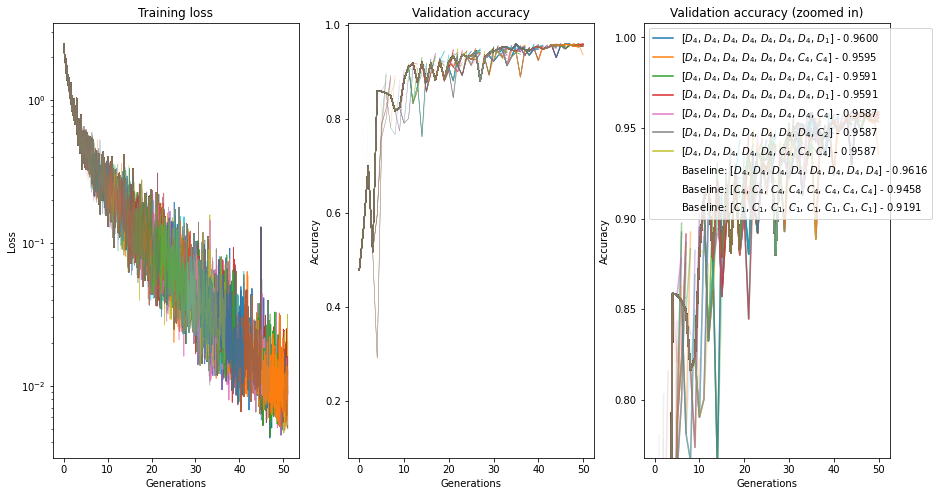

In [24]:
plothillclimb("out/olympe/logshc_2022-09-13_16:52:16.pkl","out/olympe/logsbs_2022-09-13_16:52:20.pkl")

{'epochs': 0.2, 'iterations': 50, 'lr': 0.03, 'allkids': False, 'popsize': 10, 'baselines': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': False, 'seed': -1, 'dea': True, 'noskip': False, 'pareto': True, 'test': False, 'folder': ''}
0.2904166877269745 0.9600000381469727
{'epochs': 0.2, 'iterations': 50, 'lr': 0.03, 'allkids': False, 'popsize': 10, 'baselines': True, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': False, 'seed': -1, 'dea': True, 'noskip': False, 'pareto': False, 'test': False, 'folder': ''}


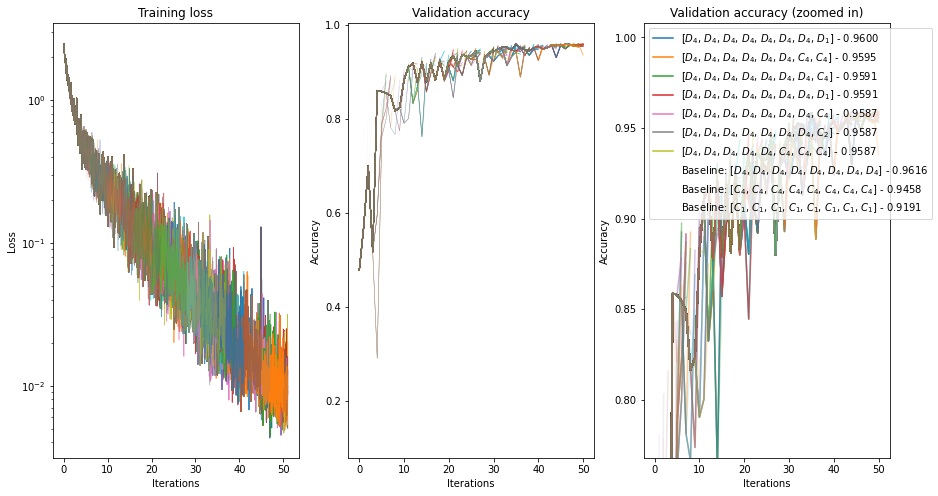

In [13]:
plothillclimb("out/olympe/logshc_2022-09-13_16:52:16.pkl", "out/olympe/logsbs_2022-09-13_16:52:20.pkl")

{'epochs': 1, 'iterations': 50, 'lr': 0.1, 'allkids': False, 'popsize': 10, 'baselines': False, 'reg': False, 'skip': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': True, 'seed': -1, 'dea': True}
0.48500001430511475 0.9750000238418579


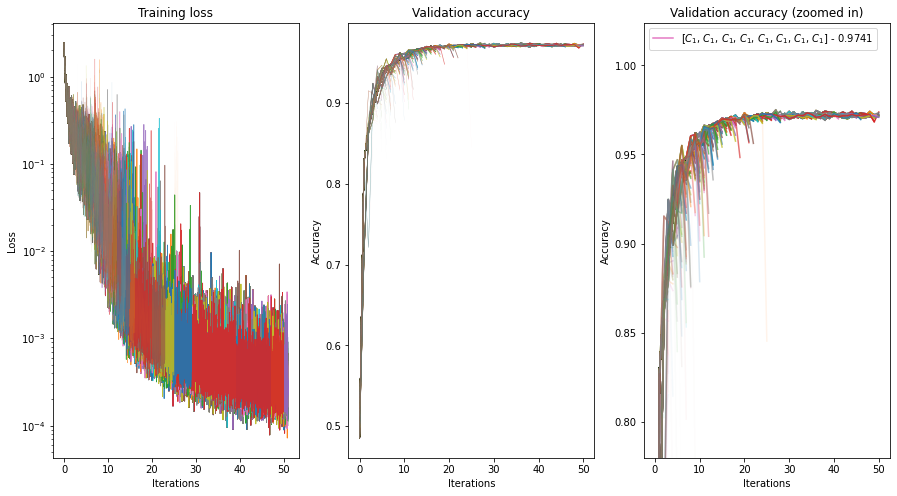

In [ ]:
plothillclimb("out/olympe/logshc_2022-09-06_15:52:35.pkl")

{'epochs': 0.5, 'generations': 100, 'lr': 0.05, 'allkids': False, 'popsize': 10, 'baselines': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': False, 'seed': 1, 'dea': True, 'noskip': False, 'pareto': False, 'test': False, 'folder': '/ermnas_mnist_lr_ep_2022-09-14.10:20:42', 'task': 'mnist'}
0.6462500095367432 0.9679166674613953 [0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0,

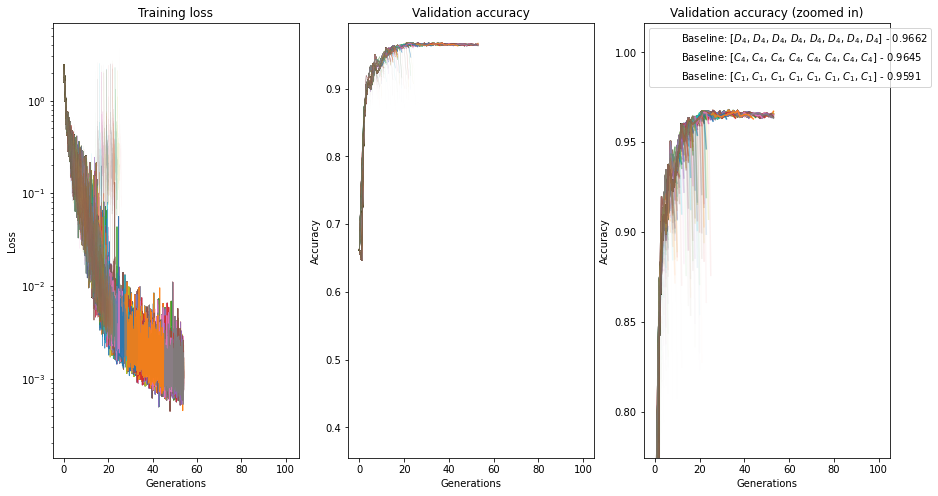

In [25]:
plothillclimb("out/olympe/ermnas_mnist_lr_ep_2022-09-14.10:20:42")

{'epochs': 1.0, 'iterations': 50, 'lr': 0.1, 'allkids': False, 'popsize': 10, 'baselines': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': False, 'seed': -1, 'dea': True}
0.6008333563804626 0.9737499952316284


No handles with labels found to put in legend.


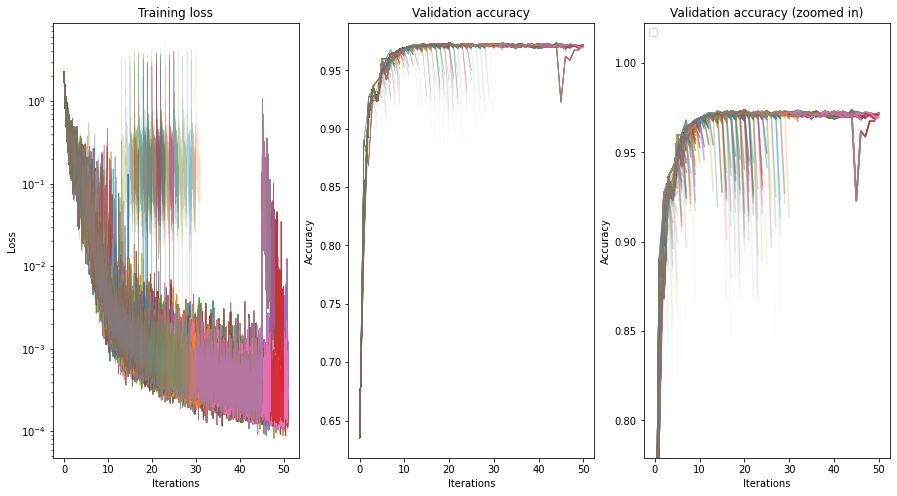

In [ ]:
plothillclimb("out/olympe/logshc_2022-09-09_14:20:04.pkl")

{'epochs': 0.5, 'iterations': 50, 'lr': 0.03, 'allkids': False, 'popsize': 10, 'baselines': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': True, 'seed': -1, 'dea': True}
0.5912500023841858 0.9633333683013916


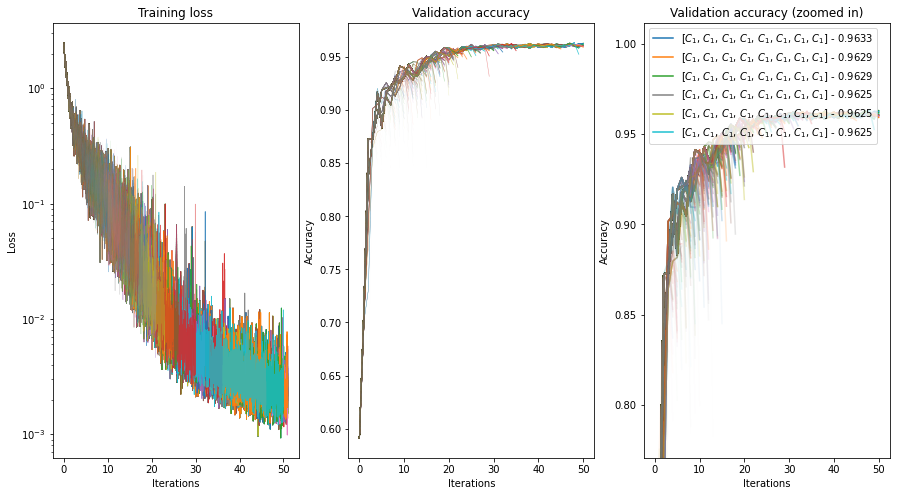

In [ ]:
plothillclimb("out/olympe/logshc_2022-09-09_14:22:08.pkl")

{'epochs': 0.5, 'iterations': 50, 'lr': 0.1, 'allkids': False, 'popsize': 10, 'baselines': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': False, 'seed': -1, 'dea': True}
0.2604166865348816 0.9762500524520874


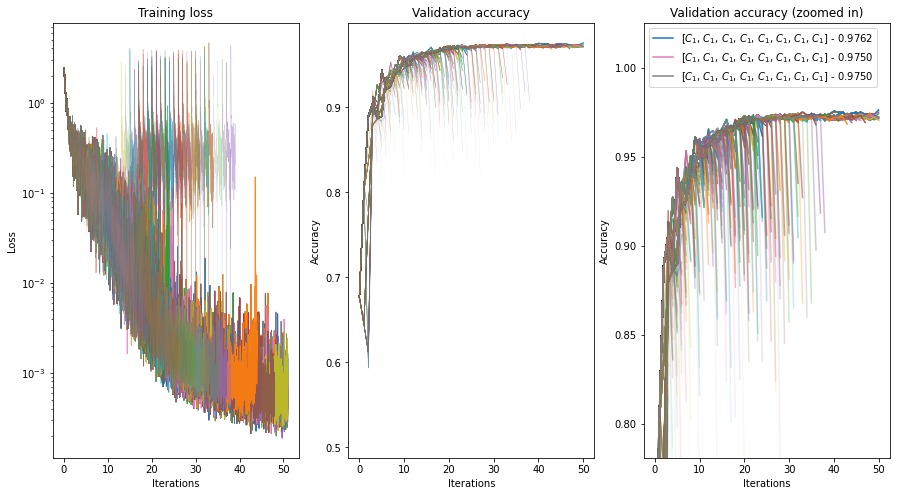

In [ ]:
plothillclimb("out/olympe/logshc_2022-09-09_16:37:30.pkl")

{'epochs': 0.5, 'iterations': 50, 'lr': 0.1, 'allkids': False, 'popsize': 10, 'baselines': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': False, 'seed': -1, 'dea': True}
0.2604166865348816 0.9762500524520874


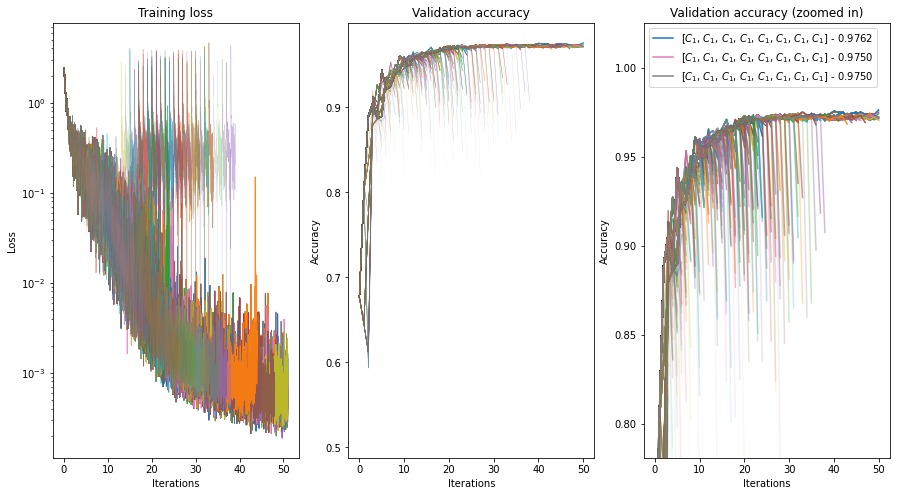

In [3]:
plothillclimb("out/olympe/logshc_2022-09-09_16:37:30.pkl")

{'epochs': 0.2, 'iterations': 50, 'lr': 0.1, 'allkids': False, 'popsize': 10, 'baselines': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': False, 'seed': -1, 'dea': True}
0.2162500023841858 0.9704166650772095


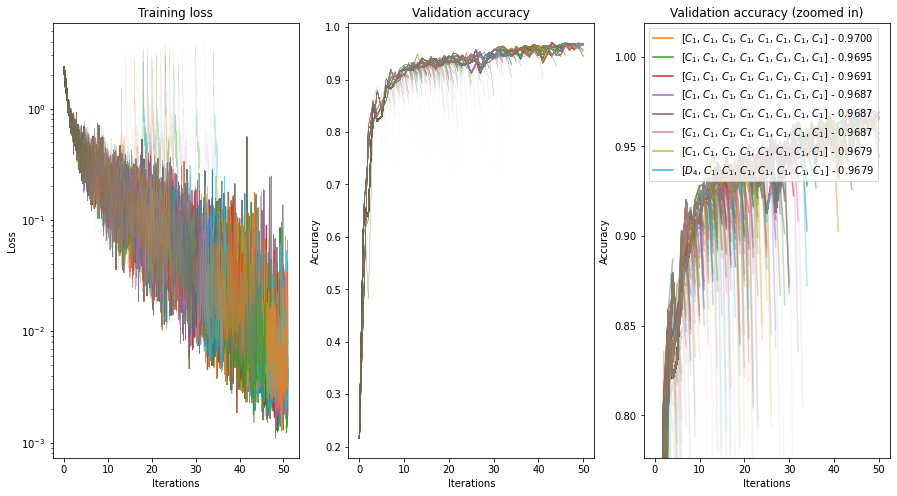

In [ ]:
plothillclimb("out/olympe/logshc_2022-09-09_16:53:27.pkl")

{'epochs': 0.2, 'iterations': 50, 'lr': 0.03, 'allkids': False, 'popsize': 10, 'baselines': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': True, 'seed': -1, 'dea': True}
0.25874999165534973 0.965416669845581


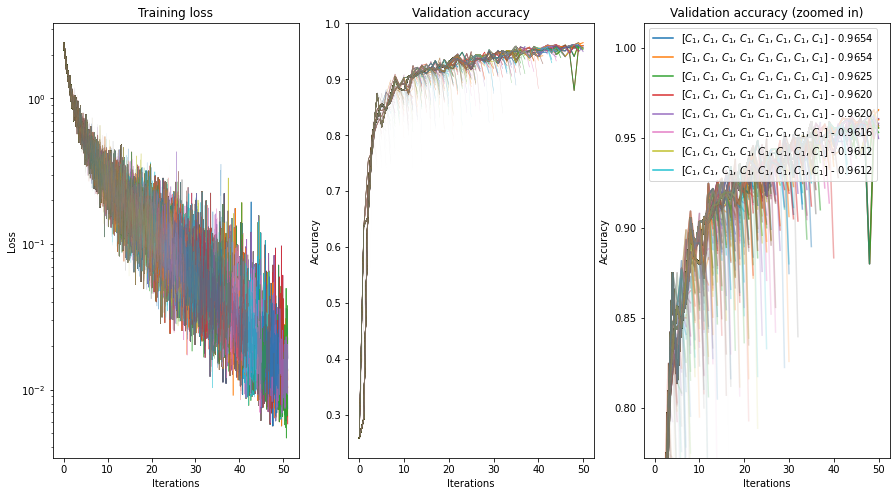

In [ ]:
plothillclimb("out/olympe/logshc_2022-09-09_17:52:37.pkl")

{'epochs': 0.2, 'iterations': 50, 'lr': 0.03, 'allkids': False, 'popsize': 10, 'baselines': False, 'data': PosixPath('/tmpdir/maile'), 'd16': False, 'c4': False, 'seed': -1, 'dea': True, 'pareto': False}
0.25208333134651184 0.9641667008399963


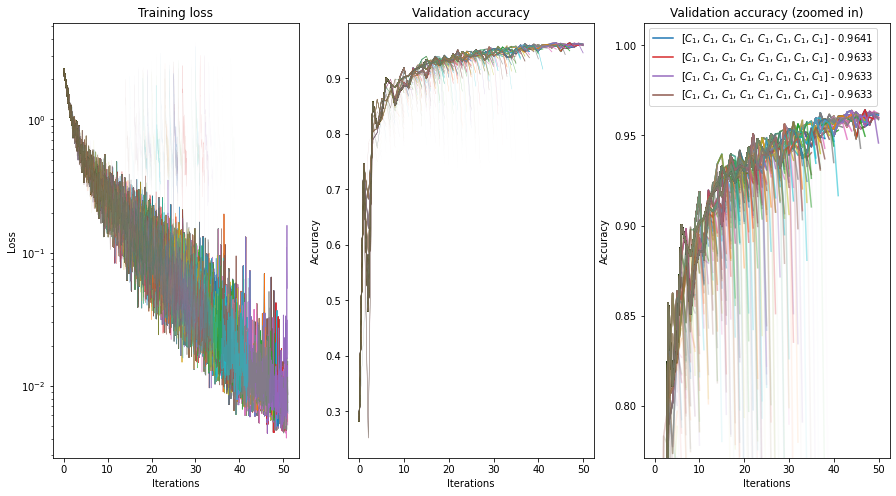

In [4]:
plothillclimb("out/olympe/logshc_2022-09-13_13:46:05.pkl")